In [1]:
from matplotlib import pylab as plt
from matplotlib import colors
import numpy as np
import math
from itertools import product

In [2]:
def triangle_FS(U, a=None, b=None, c=None, d=None, h=1, form='equal'):
	if form in ['equal', 'greater', 'less']:
		if a is None:
			a=U.min()
		if c is None:
			c=U.max()
		if b is None:
			if d is None:
				b=(a+c)/2.
			else:
				b=d
		if d is None:
			d=b
		Mu=dict()
		if a>U.min():
			for el in U[U<=a]:
				Mu[el]=h if form =='less' else 0.
		if c<U.max():
			for el in U[U>=c]:
				r=h if form=='greater' else 0.
				z=Mu.get(el,0)
				Mu[el]=r if r>z else z
		if a<b:
			for el in U[(U>=a)*(U<=b)]:
				r=0. if form=='greater' else h*float(el-a)/(b-a) if form=='equal' else h*float(b-el)/(b-a)
				z=Mu.get(el,0)
				Mu[el]=r if r>z else z
		if b<d:
			for el in U[(U>=b)*(U<=d)]:
				r=h if form=='equal' else 0.
				z=Mu.get(el,0)
				Mu[el]=r if r>z else z
		if d<c:
			for el in U[(U>=d)*(U<=c)]:
				r=0. if form=='less' else h*float(el-d)/(c-d) if form=='greater' else h*float(c-el)/(c-d)
				z=Mu.get(el,0)
				Mu[el]=r if r>z else z
		return Mu
	else:
		print 'Unknown form'
		return None

In [3]:
def FS_plot(FS, colors=colors.cnames.keys(), labels=None, title=None, name=None):
	for idx, el in enumerate(FS):
		mas=np.array(sorted(el.items(), key=lambda x: x[0])).T
		if (labels is None):
			lab=' '
		else:
			lab=labels[idx]
			plt.plot(mas[0],mas[1],color=colors[idx],label=lab)
		if not (labels is None):
			plt.legend(loc='upper right')
		if not (title is None):
			plt.title(title)
		if not (name is None):
			plt.savefig(name+'.png', format='png', dpi=100)
        plt.show()

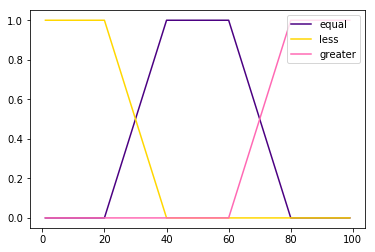

In [4]:
Spr=np.arange(1,100,1)
Pr1=triangle_FS(Spr,a=20, b=40, d=60, c=80, h=1, form='equal')
Pr2=triangle_FS(Spr,a=20, b=40, d=60, c=80, h=1, form='less')
Pr3=triangle_FS(Spr,a=20, b=40, d=60, c=80, h=1, form='greater')
FS_plot([Pr1, Pr2, Pr3],labels=['equal','less','greater'])

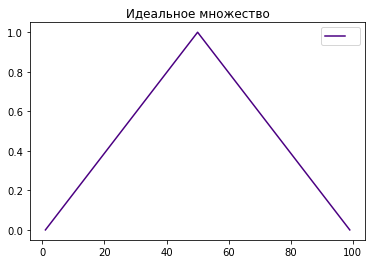

In [5]:
Pr4=triangle_FS(Spr, h=1)
FS_plot([Pr4], labels=[' '], title=U'Идеальное множество')

In [6]:
print(Pr2[22])
print(Pr4[53])

0.9
0.9387755102040817


In [7]:
def F_And (FV, method='minimax'):
    if method=='minimax':
        return np.min(FV)
    elif method=='probability':
        return np.product(FV)
    else:
        print 'Неизвестный метод ', method
        return None
    
def F_Or (FV, method='minimax'):
    if method=='minimax':
        return np.max(FV)
    elif method=='probability':
        mu=0
        for el in fv:
            mu=mu+el-mu*el
        return mu
    else:
        print 'Неизвестный метод ', method
        return None

def F_Not (V1):
    return 1-V1

In [8]:
def alpha_srez (FS, alpha=0.5):
    alph=1e-10 if alpha==0. else alpha
    mas=np.array(FS.items()).T
    return set(mas[0][mas[1]>=alph])

In [9]:
def FS_moment(FS, centr=None):
    mas=np.array(FS.items()).T
    if centr is None:
        Cntr_g=np.sum(mas[0]*mas[1])/np.sum(mas[1])
    else:
        Cntr_g=centr
    return np.sum(mas[1]*np.square(mas[0]-Cntr_g))

def FS_describe(FS, method='minimax', verbose=True):
    mas=np.array(FS.items()).T
    h=np.max(mas[1])
    N=np.sum(mas[1]>0)
    Min_el=np.min(mas[0][mas[1]>0])
    Max_el=np.max(mas[0][mas[1]>0])
    Fst_max=np.min(mas[0][mas[1]==h])
    Lst_max=np.max(mas[0][mas[1]==h])
    Cntr_max=mas[0][mas[1]==h].mean()
    Cntr_grav=np.sum(mas[0]*mas[1])/np.sum(mas[1])
    Mmnt_in=FS_moment(FS)
    R1=-np.sum([0 if x==0 else x*np.log2(x) for x in mas[1]])
    R1n=(2.*R1)/len(mas[1])
    R2=2./len(mas)*np.sum([F_And([x,F_Not(x)], method=method) for x in mas[1]])
    R3=2./np.sqrt(len(mas[1]))*np.sqrt(np.sum([F_And([x,F_Not(x)], method=method)**2 for x in mas[1]]))
    if verbose:
        print 'Высота= ', h
        print 'Мощность= ',N
        print 'Диапазон значений: ',(Min_el, Max_el)
        print 'Максимумы: ', (Fst_max, Cntr_max, Lst_max)
        print 'Момент инерции= ', Mmnt_in
        print 'Размытость:'
        print 'Энтропийная мера: ', (R1, R1n)
        print 'Альтернатива 1 (Линейная): ', R2
        print 'Альтернатива 2 (Квадратичная): ', R3
    return (h, N, (Min_el, Max_el), (Fst_max, Cntr_max, Lst_max), Cntr_grav, Mmnt_in, ((R1, R1n), R2, R3))

In [10]:
alpha_srez (Pr1, alpha=0)

{21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0}

In [11]:
FS_describe(Pr1)

Высота=  1.0
Мощность=  59
Диапазон значений:  (21.0, 79.0)
Максимумы:  (40.0, 50.0, 60.0)
Момент инерции=  6660.0
Размытость:
Энтропийная мера:  (14.355046155633588, 0.29000093243704217)
Альтернатива 1 (Линейная):  10.0
Альтернатива 2 (Квадратичная):  0.3679042475339682


(1.0,
 59,
 (21.0, 79.0),
 (40.0, 50.0, 60.0),
 50.0,
 6660.0,
 ((14.355046155633588, 0.29000093243704217), 10.0, 0.3679042475339682))

In [12]:
r=FS_describe(Pr1)
print FS_moment(Pr1, r[3][0])
print FS_moment(Pr1, r[3][1])
print FS_moment(Pr1, r[3][2]) 

Высота=  1.0
Мощность=  59
Диапазон значений:  (21.0, 79.0)
Максимумы:  (40.0, 50.0, 60.0)
Момент инерции=  6660.0
Размытость:
Энтропийная мера:  (14.355046155633588, 0.29000093243704217)
Альтернатива 1 (Линейная):  10.0
Альтернатива 2 (Квадратичная):  0.3679042475339682
10660.0
6660.0
10660.0


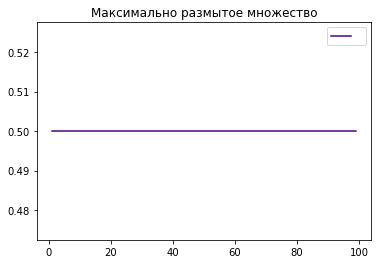

Высота=  0.5
Мощность=  99
Диапазон значений:  (1.0, 99.0)
Максимумы:  (1.0, 50.0, 99.0)
Момент инерции=  40425.0
Размытость:
Энтропийная мера:  (49.5, 1.0)
Альтернатива 1 (Линейная):  49.5
Альтернатива 2 (Квадратичная):  1.0


In [13]:
#Пример 1. Максимальная размытость
D_pr1=triangle_FS(Spr, b=0, d=100, h=0.5)
FS_plot([D_pr1], title=u'Максимально размытое множество', name='p6', labels=' ')
r=FS_describe(D_pr1)

In [14]:
alpha_srez(Pr1, alpha=0.5)

{30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0}

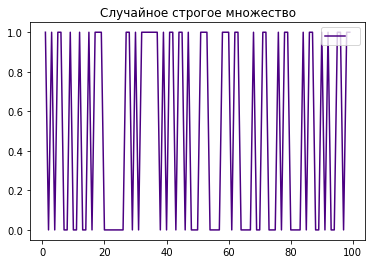

Высота=  1
Мощность=  48
Диапазон значений:  (1, 99)
Максимумы:  (1, 49.666666666666664, 99)
Момент инерции=  39372
Размытость:
Энтропийная мера:  (-0.0, -0.0)
Альтернатива 1 (Линейная):  0.0
Альтернатива 2 (Квадратичная):  0.0


In [15]:
#Пример 2. Строгое множество
D_pr2=dict()
for el in Spr:
    D_pr2[el]=np.random.randint(2)
FS_plot([D_pr2], title=u'Случайное строгое множество', labels=' ')
r=FS_describe(D_pr2)